In [57]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

In [58]:
with h5py.File('../data/chease/ns128/topovisdata-0-0.h5') as f:
    R = f['R'][()]
    Z = f['Z'][()]
    POT = f['Poten'][()]

r2d = np.reshape(R, (128,128))
z2d = np.reshape(Z, (128,128))
pot2d = np.reshape(POT, (128,128))

slc = np.s_[0:None:4, :]

r = np.ravel(r2d[slc])
z = np.ravel(z2d[slc])
pot = np.ravel(pot2d[slc])

In [59]:
def make_regular_triangles(nx, ns, dir='r', periodic=False):
    """
    Args
    ----
    nx : int
        number of grid points in psi-direction
    ns : int
        number of grid points in s-direction
    dir : str
        direction for drawing the diagonal line. either 'l' or 'r'
    periodic : bool
        whether triangles should be added between the first and last s-grid points.
    
    Returns
    -------
    triangles : ndarray, shape (2*(n[-1]*m-1), 3), n gets subtracted by one if `periodic` is `False`.
        Array representing a regular triangle grid with counter-clockwise indices. The values are referencing indices of a flattened x-s-grid.
    
    Examples
    --------
    >>> make_regular_triangle_grid(nx=2, ns=3, dir='r', periodic=False) 
    >>> 0 - 1 - 2
    >>> | / | / |
    >>> 3 - 4 - 5

    >>> make_regular_triangle_grid(nx=2, ns=3, dir='l', periodic=True) 
    >>> 0  - 1  - 2  - 0
    >>> | \\ | \\ | \\ |
    >>> 3  - 4  - 5  - 3
    """

    # check args
    if nx < 2 : raise ValueError(f'nx has to be at least 2, got {nx}')
    if ns < 2 : raise ValueError(f'ns has to be at least 2, got {nx}')
    if dir != 'l' and dir != 'r': raise ValueError(f"dir must be either 'l' or 'r', got {dir}")

    # construct indices grid
    xi = np.arange(nx)
    si = np.arange(ns)

    ss, xx = np.meshgrid(si, xi)    # has to be in this order
    # ss = [[0,1,2,..., ns-1], [0,1,2, ..., ns-1], ... [   0,    1,    2, ... ns-1]]
    # xx = [[0,0,0,...,    0], [1,1,1, ...,    1], ... [nx-1, nx-1, nx-1, ... nx-1]]

    if periodic:
        # concat first s points to end 

        ss = np.concatenate((ss, np.zeros(shape=(nx,1), dtype=int)), axis=1)
        # ss = [[0,1,2,..., ns-1, 0], [0,1,2, ..., ns-1, 0], ... [   0,    1,    2, ... ns-1,    0]]

        xx = np.concatenate ((xx, np.reshape(xi, (nx, 1))), axis=1)
        # xx = [[0,0,0,...,    0, 0], [1,1,1, ...,    1, 1], ... [nx-1, nx-1, nx-1, ... nx-1, nx-1]]

    # a - b
    # | X |
    # c - d

    # NOTE: contrary to the name 'flat' this is still a 2D-array
    # this translates every pair of xi and si indices to one index j in a *flattened* x or s array.
    flat = ss + xx * ns

    # this doesn't copy values and just creates views of the original array
    a = flat[   :-1,  :-1]
    b = flat[   :-1, 1:  ]
    c = flat[1  :  ,  :-1]
    d = flat[1  :  , 1:  ]

    # flatten arrays in preparation for np.column_stack
    a_flat = np.ravel(a)
    b_flat = np.ravel(b)
    c_flat = np.ravel(c)
    d_flat = np.ravel(d)
    
    if dir == 'r':
        triangles = np.concat((np.column_stack((a_flat, c_flat, b_flat)), np.column_stack((b_flat, c_flat, d_flat))))
    elif dir == 'l':
        triangles = np.concat((np.column_stack((a_flat, c_flat, d_flat)), np.column_stack((a_flat, d_flat, b_flat))))

    return triangles

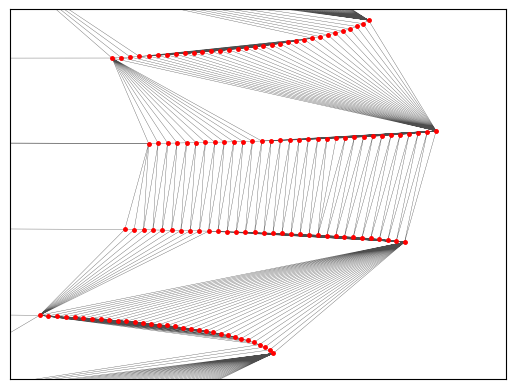

In [60]:
fig, ax = plt.subplots()

ax.set_ylim(-0.02, 0.092)
ax.set_xlim(1.245, 1.26)
ax.triplot(r, z, lw=0.25, c='0.3')
ax.scatter(r, z, c='r', marker='.', edgecolors='0', lw=0, s=50)
ax.set_xticks([])
ax.set_yticks([])

plt.savefig('../figs/numerical_artifacts/chease_bad_triangles.svg')

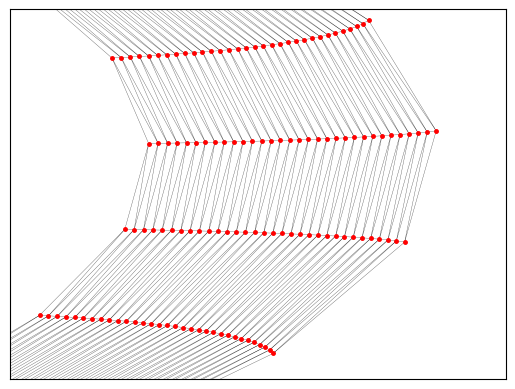

In [61]:
triangles = make_regular_triangles(32, 128, periodic=True)

fig, ax = plt.subplots()

ax.set_ylim(-0.02, 0.092)
ax.set_xlim(1.245, 1.26)
ax.triplot(r, z, triangles, lw=0.25, c='0.3')
ax.scatter(r, z, c='r', marker='.', edgecolors='0', lw=0, s=50)
ax.set_xticks([])
ax.set_yticks([])

plt.savefig("../figs/numerical_artifacts/chease_regular_triangles.svg")

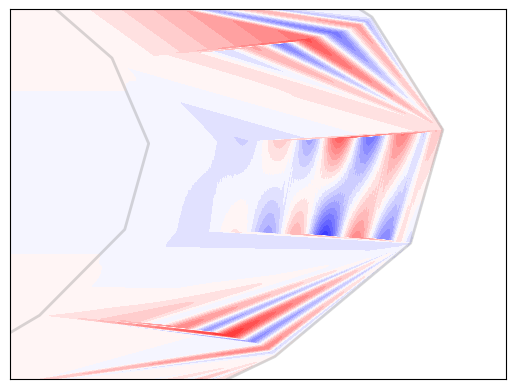

In [62]:
fig, ax = plt.subplots()

ax.set_ylim(-0.02, 0.092)
ax.set_xlim(1.245, 1.26)
ax.tricontourf(R, Z, POT, levels=200, cmap='seismic', vmin=-0.5, vmax=0.5)
#ax.triplot(r, z, lw=0.25, c='0.7')
#ax.scatter(r, z, c='r', marker='.', edgecolors='0', lw=0, s=50)
#ax.set_aspect('equal')
ax.plot(np.ravel(r2d[-1, :]), np.ravel(z2d[-1, :]), color='grey', alpha=0.3, linewidth=2)
ax.plot(np.ravel(r2d[0, :]), np.ravel(z2d[0, :]), color='grey', alpha=0.3, linewidth=2)

ax.set_xticks([])
ax.set_yticks([])

plt.savefig('../figs/numerical_artifacts/chease_numerical_artifacts.svg')


/tmp/ipykernel_11432/3279427509.py:7: UserWarning: The following kwargs were not used by contour: 'triangles'
  ax.tricontourf(R, Z, POT, triangles=triangles, levels=200, cmap='seismic', vmin=-0.5, vmax=0.5)


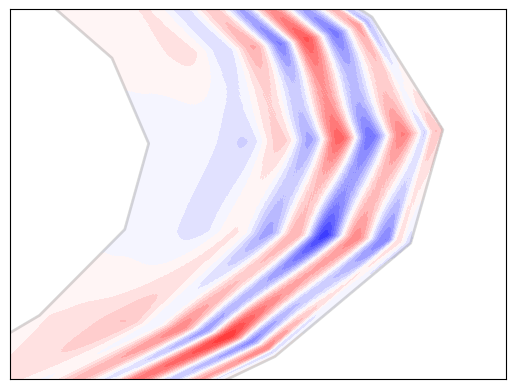

In [63]:
triangles = make_regular_triangles(128, 128, periodic=True)

fig, ax = plt.subplots()

ax.set_ylim(-0.02, 0.092)
ax.set_xlim(1.245, 1.26)
ax.tricontourf(R, Z, POT, triangles=triangles, levels=200, cmap='seismic', vmin=-0.5, vmax=0.5)
ax.plot(np.ravel(r2d[-1, :]), np.ravel(z2d[-1, :]), color='grey', alpha=0.3, linewidth=2)
ax.plot(np.ravel(r2d[0, :]), np.ravel(z2d[0, :]), color='grey', alpha=0.3, linewidth=2)

# ax.set_xlabel('R', fontsize=16)
# ax.set_ylabel('Z', fontsize=16)
ax.set_xticks([])
ax.set_yticks([])

plt.savefig('../figs/numerical_artifacts/chease_no_artifacts.svg')


/tmp/ipykernel_11432/3231497618.py:15: UserWarning: The following kwargs were not used by contour: 'triangles'
  axs[0,1].tricontourf(R, Z, POT, triangles=triangles, levels=200, cmap='seismic', vmin=-0.5, vmax=0.5)


<Figure size 640x480 with 0 Axes>

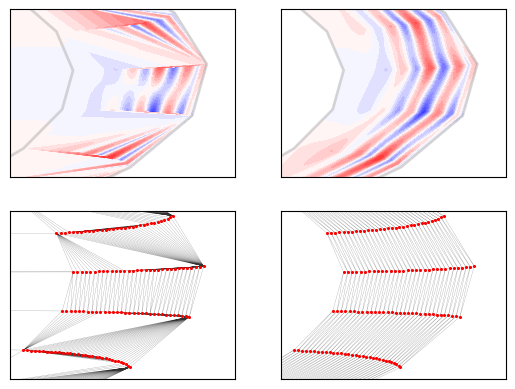

In [72]:
plt.tight_layout()
fig, axs = plt.subplots(2, 2)

for ax in np.ravel(axs):
    ax.set_ylim(-0.02, 0.092)
    ax.set_xlim(1.245, 1.26)
    ax.set_xticks([])
    ax.set_yticks([])

axs[0,0].tricontourf(R, Z, POT, levels=200, cmap='seismic', vmin=-0.5, vmax=0.5)
axs[0,0].plot(np.ravel(r2d[-1, :]), np.ravel(z2d[-1, :]), color='grey', alpha=0.3, linewidth=2)
axs[0,0].plot(np.ravel(r2d[0, :]), np.ravel(z2d[0, :]), color='grey', alpha=0.3, linewidth=2)

triangles = make_regular_triangles(128,128, periodic=True)
axs[0,1].tricontourf(R, Z, POT, triangles=triangles, levels=200, cmap='seismic', vmin=-0.5, vmax=0.5)
axs[0,1].plot(np.ravel(r2d[-1, :]), np.ravel(z2d[-1, :]), color='grey', alpha=0.3, linewidth=2)
axs[0,1].plot(np.ravel(r2d[0, :]), np.ravel(z2d[0, :]), color='grey', alpha=0.3, linewidth=2)


axs[1,0].triplot(r, z, lw=0.1, c='0.2')
axs[1,0].scatter(r, z, c='r', marker='.', edgecolors='0', lw=0, s=20)

triangles = make_regular_triangles(32, 128, periodic=True)
axs[1,1].triplot(r, z, triangles, lw=0.1, c='0.2')
axs[1,1].scatter(r, z, c='r', marker='.', edgecolors='0', lw=0, s=20)